In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [3]:
df = pd.read_csv("datasets/wdbc.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
X = df.values[:,2:-1]
y = df["diagnosis"].apply(lambda x: 1 if x=='M' else -1).values

In [6]:
X = MinMaxScaler().fit_transform(X)

In [7]:
X.shape

(569, 30)

In [8]:
sum(y==-1)

357

In [9]:
df.columns[2:-1].values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [54]:
svm = BinarizedSVM(C=1, verbose=True)
svm.fit(X, y, predictor_variables_names=df.columns[2:-1].values)
y_pred = svm.predict(X)
accuracy_score(y_pred, y)

Nomi delle variabili: ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.38189218609494063	 b_minus:0.03360310473756445
	aggiungo soglia+ per 0...
scelgo le soglie per 1...
soglie trovate: b_plus:0.382144064930673	 b_minus:0.03415623943185658
	aggiungo soglia+ per 1...
scelgo le soglie per 2...
soglie trovate: b_plus:0.37219266118443795	 b_minu

0.9402460456942003

In [18]:
accuracy_score(y_pred, y)

0.9402460456942003

[(0.38189218609494063, -0.5322889887763266), (0.35491504567182547, -3.273947166734912), (0.30238061432154856, 0.8794049177809465)]
[(0.5897869462292863, -1.9999999996711944), (0.382144064930673, 1.999999999891281), (0.3486641866756848, 2.000000001300487), (0.3256679066621575, 1.9999999996702134), (0.30875887724044637, 0.899297660444392)]
[(0.37219266118443795, 1.4677110095941193), (0.36583511851288786, 0.5899270261173216), (0.2933453113122797, -4.082785450282476)]
[(0.23554612937433722, 0.9883516541462906), (0.18201484623541886, -0.20150671477594398), (0.17289501590668083, 0.9459807483408579)]
[(0.5233366434955313, -0.16346775774296787), (0.5034756703078451, 1.9999999999277507), (0.39035840028888685, 3.6753059722624934)]
[(0.2346481810931845, -2.0688130944945096), (0.22467946751733023, -1.4996832882605677)]
[(0.2738987816307404, 3.99999999958617), (0.22888940955951262, 1.754437233996405), (0.14418931583880035, -0.5661552546249399)]
[(0.2678926441351889, 1.429295392985698), (0.261033797

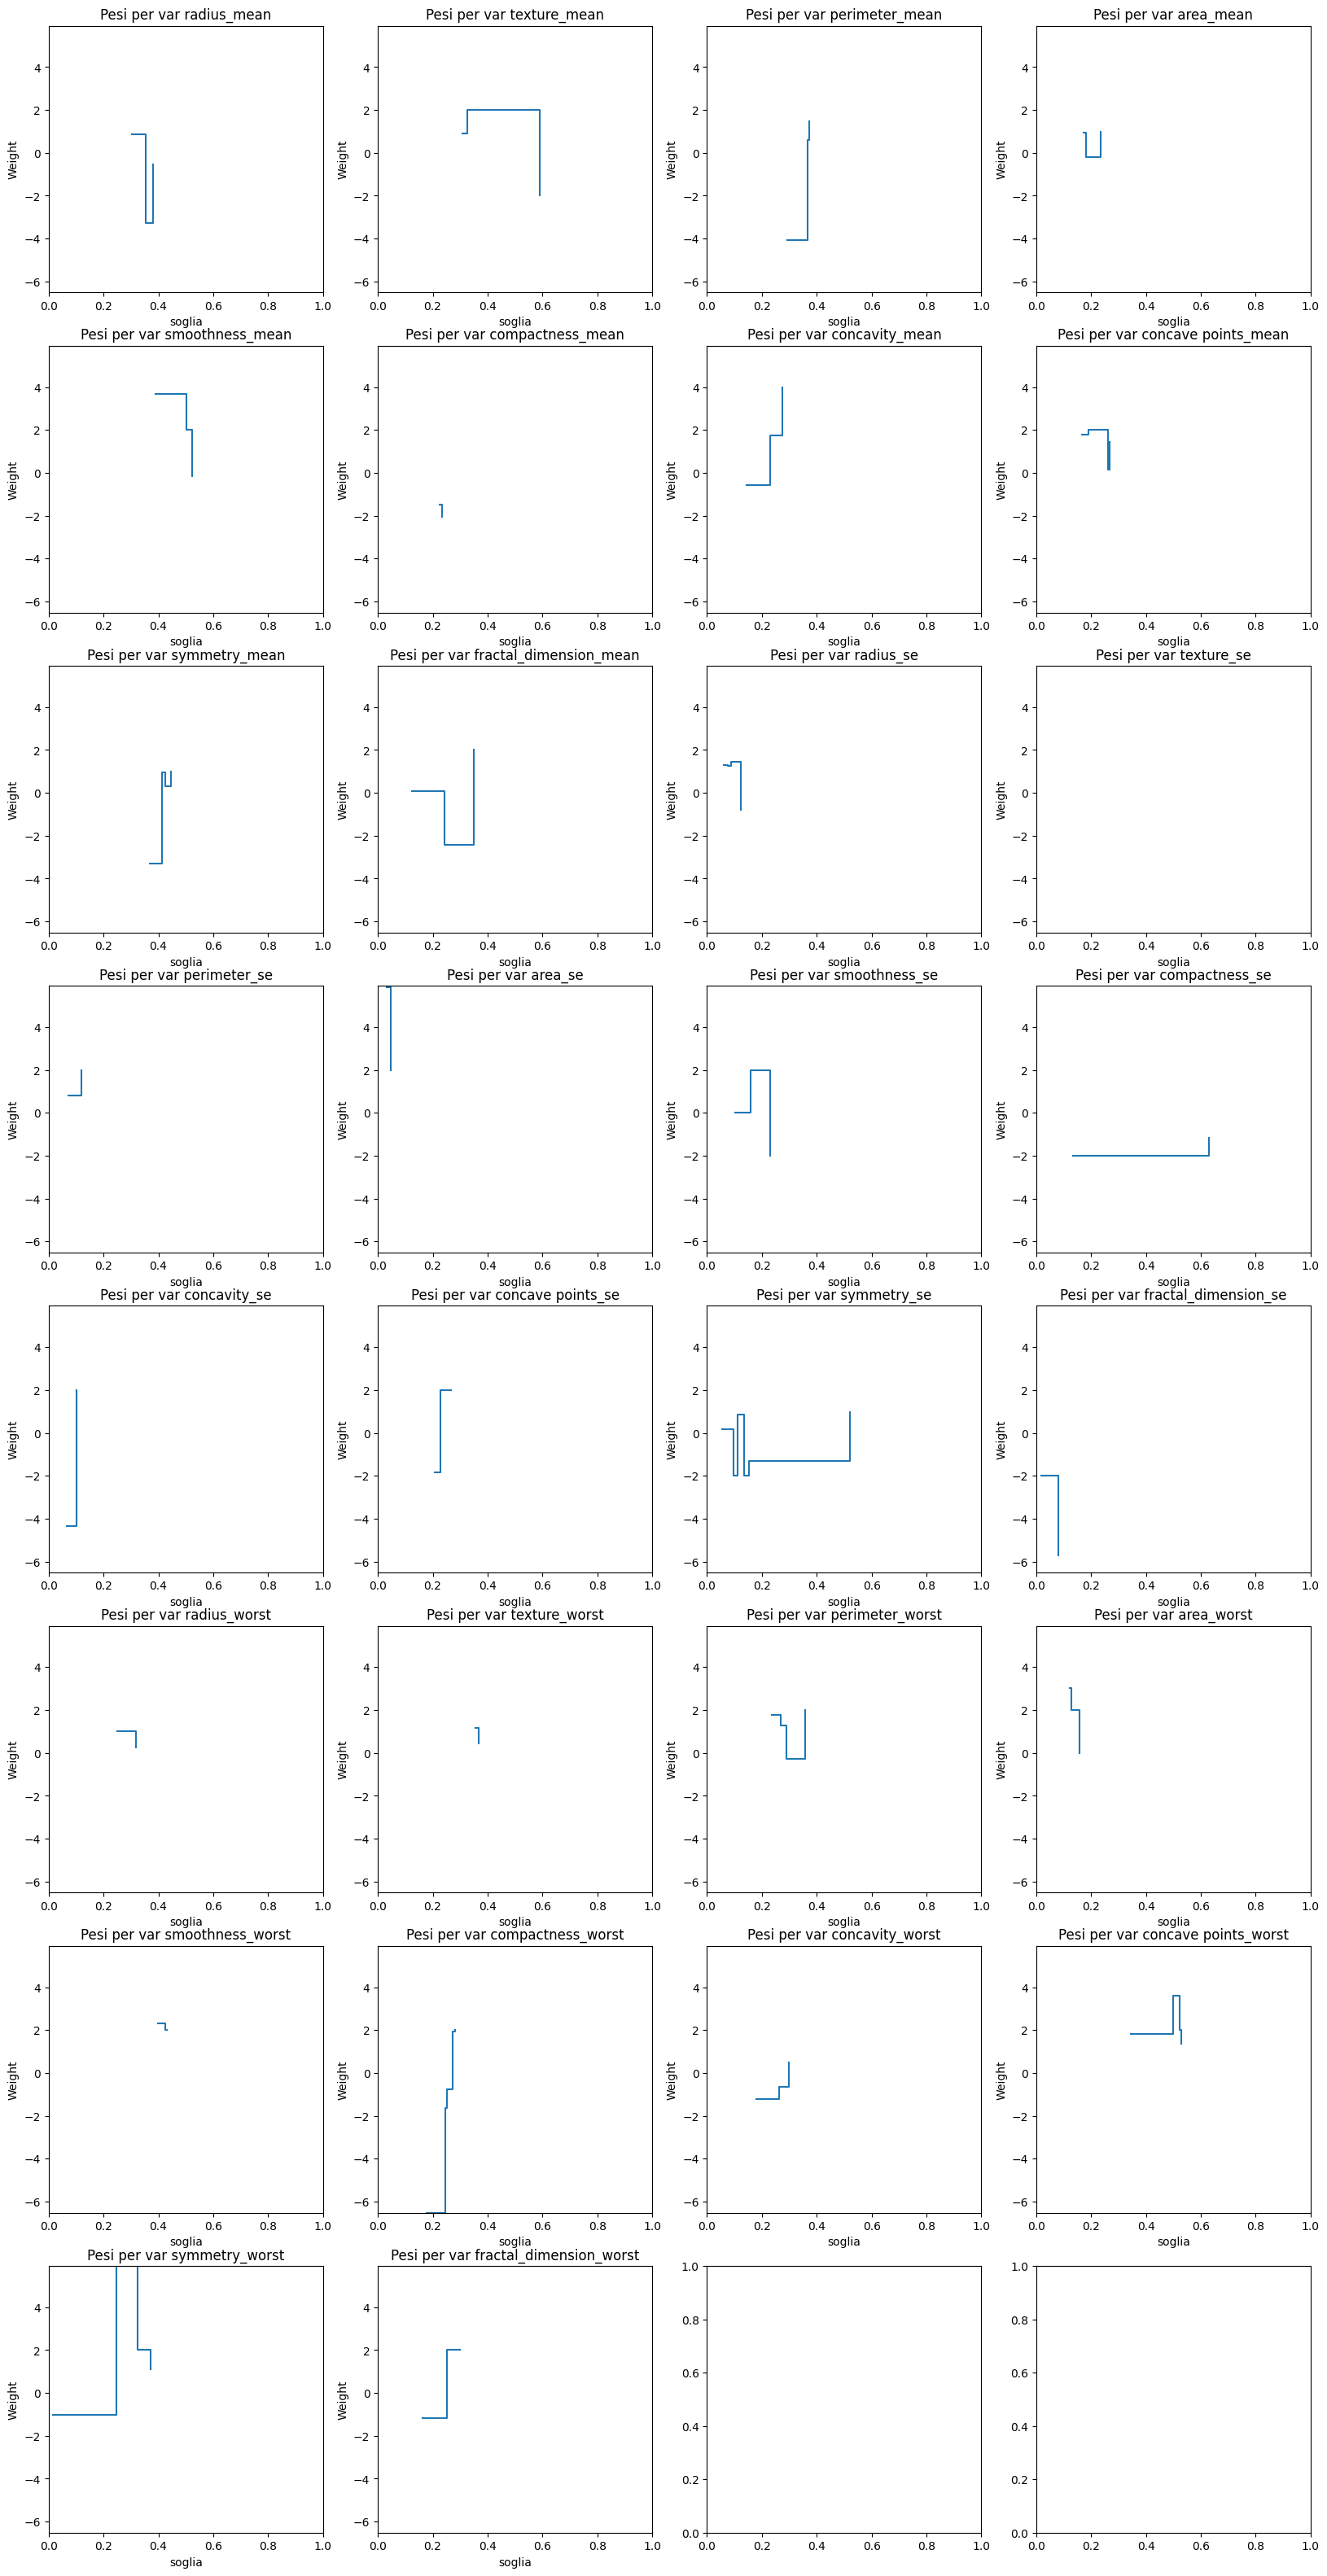

In [62]:
BinarizedSVM.visualizza_soglie(svm)

In [26]:
from sklearn.svm import SVC

In [40]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

0.9824253075571178

In [41]:
print(sum(y==-1), sum(y==1))
print(sum(y==1)/len(y))

357 212
0.37258347978910367
